# TensorFlow

TensorFlow is a package with strong applicability, used in industry with many applications, that allows to use machine learning and artificial intelligence with strong dedicated hardware and many specific models. Its modular nature allows us to create customized models very rapidly, and with a large toolbox of methods to be applied to a large variety of models. 

As a downside, tensorflow does not provide a lot of information about its internal processes, thus it should be interpreted as a black box. In the same direction, TensorFlow is versatile, but it is difficult to further customize its models beyond the applicability conceived by the developers. 

In [1]:
import tensorflow as tf # central machinery
from keras.datasets import mnist # datasets
from keras import layers # layers in the neural networks
import numpy as np
import os
import time
import PIL
import imageio # These are for visualization properties
import glob
from IPython import display

import matplotlib.pyplot as plt

2025-01-14 15:42:42.294244: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-14 15:42:42.355182: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-14 15:42:42.401376: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1736865762.446215   52157 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1736865762.460767   52157 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-14 15:42:42.568663: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [2]:
# Same problem as before, classify handwritten digits. In this case, the images are larger! (28 x 28)

((X_train, y_train), (X_test, y_test)) = mnist.load_data()


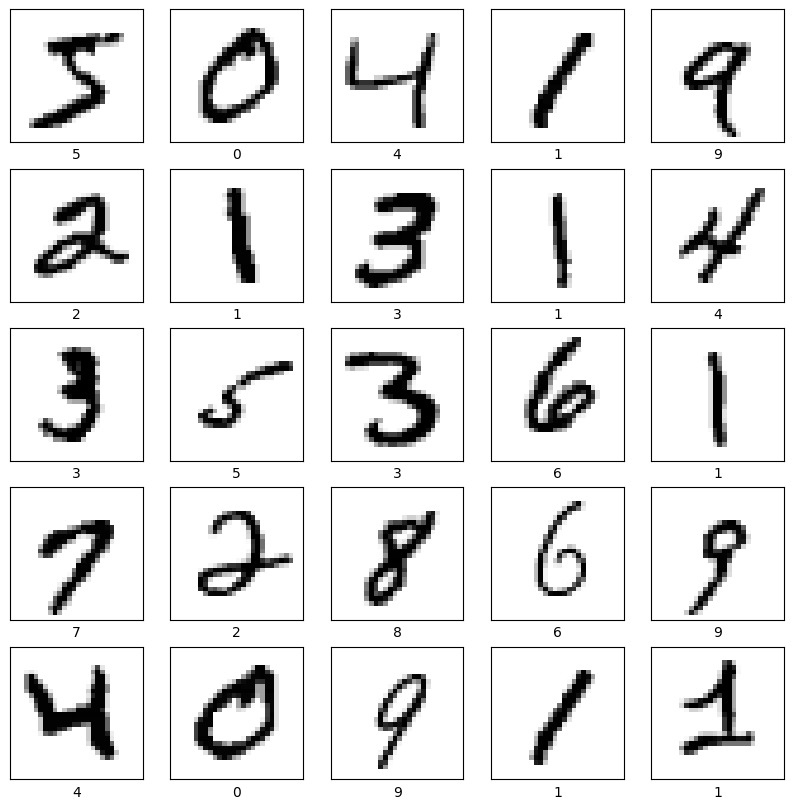

In [3]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()


In [4]:
# normalization

def normalize_img(image):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255.

X_train = normalize_img(X_train)
X_test = normalize_img(X_test)




2025-01-14 15:42:59.215036: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2025-01-14 15:42:59.216677: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 47040000 exceeds 10% of free system memory.
2025-01-14 15:42:59.270119: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.
2025-01-14 15:42:59.369172: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.
2025-01-14 15:42:59.470376: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.
2025-01-14 15:42:59.481706: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


In [5]:
# We create now the model through the application of several layers

model = tf.keras.models.Sequential([
  tf.keras.layers.InputLayer(shape=(28, 28)) , 
  tf.keras.layers.Flatten(input_shape=(28, 28)), # Transformation of squared images to 1-dimensional arrays
  tf.keras.layers.Dense(128, activation='relu'), # fully connected layer, with output 128
  tf.keras.layers.Dense(10)                      # Second layer, with output 10, and final layer
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001), # Optimizer, can be changed
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # Loss function, can be changed
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()], # Metrics, to check the performance
)

model.fit(
    X_train, y_train, epochs = 10
) # In each epoch, the training data is shuffled to improve learning


Epoch 1/10


/home/perezsalinas/Trabajo/venvs/mbr/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.4308 - sparse_categorical_accuracy: 0.8780
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1199 - sparse_categorical_accuracy: 0.9653
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0780 - sparse_categorical_accuracy: 0.9763
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0561 - sparse_categorical_accuracy: 0.9822
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0417 - sparse_categorical_accuracy: 0.9879
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0346 - sparse_categorical_accuracy: 0.9898
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0279 - sparse_categorical_accuracy: 0.9922
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0206 - sparse_categorical_accuracy: 0.9934
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0163 - sparse_categorical_accuracy: 0.9955
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2m

In [6]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)

y_pred = np.argmax(model.predict(X_test), axis = 1)


313/313 - 0s - 1ms/step - loss: 0.0994 - sparse_categorical_accuracy: 0.9734

Test accuracy: 0.9733999967575073
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step


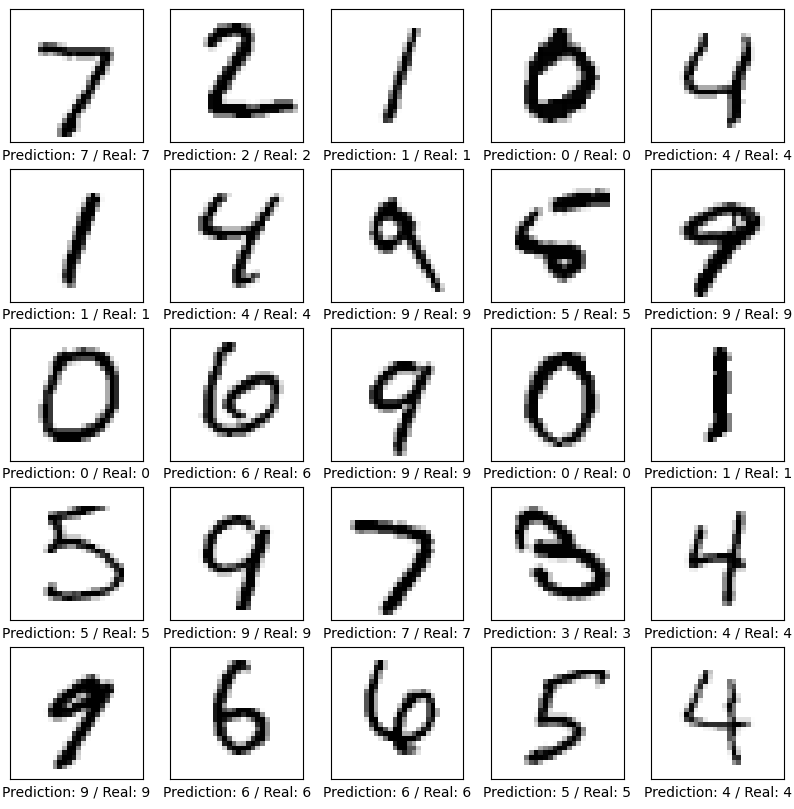

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i], cmap=plt.cm.binary)
    plt.xlabel('Prediction: %s / Real: %s'%(y_pred[i], y_test[i]))
plt.show()

In [8]:
# We create now the model through the application of several layers. 
# IN this example we use a convolutional neural networks, that we have mentioned it is ideal for image processing

# Question: Do we need it?

model = tf.keras.models.Sequential([
  tf.keras.layers.InputLayer(shape=(28, 28, 1)), 
  tf.keras.layers.Conv2D(10, 2, input_shape=(28, 28, 1)), # Convolutional layer of squared images
  tf.keras.layers.Flatten(input_shape=(10, 10)), 
  tf.keras.layers.Dense(128, activation='relu'), # fully connected layer, with output 128
  tf.keras.layers.Dense(10)                      # Second layer, with output 10, and final layer
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001), # Optimizer, can be changed
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # Loss function, can be changed
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()], # Metrics, to check the performance
)

model.fit(
    X_train, y_train, epochs = 10
) # In each epoch, the training data is shuffled to improve learning




Epoch 1/10


/home/perezsalinas/Trabajo/venvs/mbr/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - loss: 0.3261 - sparse_categorical_accuracy: 0.8995
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - loss: 0.0920 - sparse_categorical_accuracy: 0.9721
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - loss: 0.0567 - sparse_categorical_accuracy: 0.9815
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - loss: 0.0405 - sparse_categorical_accuracy: 0.9878
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - loss: 0.0295 - sparse_categorical_accuracy: 0.9906
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - loss: 0.0236 - sparse_categorical_accuracy: 0.9919
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - loss: 0.0159 - sparse_categorical_accuracy: 0.9946
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - loss: 0.0145 - sparse_categorical_accuracy: 0.9948
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - loss: 0.0123 - sparse_categorical_accuracy: 0.9960
Epoch 10/10
1875/1875 ━━━━━━━━

313/313 - 1s - 2ms/step - loss: 0.1394 - sparse_categorical_accuracy: 0.9750

Test accuracy: 0.9750000238418579
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


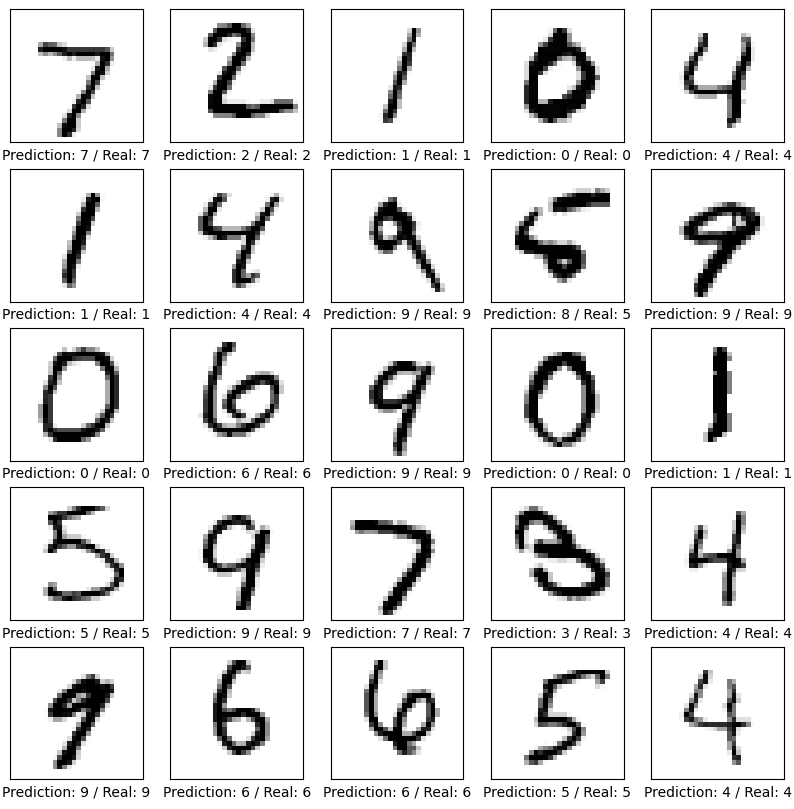

In [9]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)

y_pred = np.argmax(model.predict(X_test), axis = 1)

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i], cmap=plt.cm.binary)
    plt.xlabel('Prediction: %s / Real: %s'%(y_pred[i], y_test[i]))
plt.show()

## Fashion - MNIST

In [10]:
# Same, with a more interesting dataset

import tensorflow as tf
from keras.datasets import fashion_mnist
import numpy as np

import matplotlib.pyplot as plt

In [11]:
((X_train, y_train), (X_test, y_test)) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']



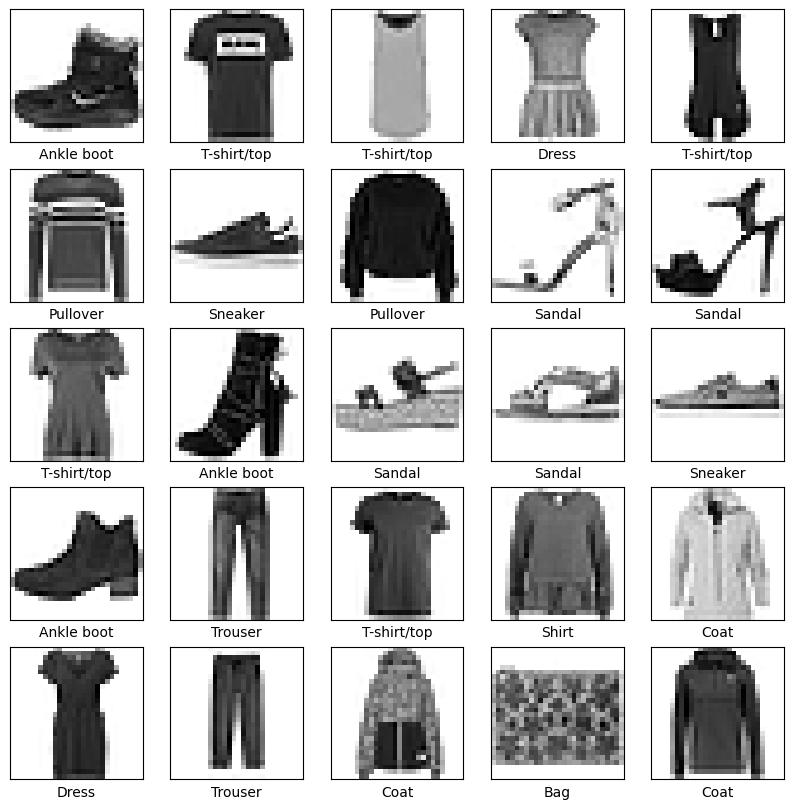

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()


In [13]:
def normalize_img(image):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255.

X_train = normalize_img(X_train)
X_test = normalize_img(X_test)




In [14]:
model = tf.keras.models.Sequential([
  tf.keras.layers.InputLayer(shape=(28, 28, 1)), 
  tf.keras.layers.Conv2D(10, 2, input_shape=(28, 28, 1)), # Convolutional layer of squared images
  tf.keras.layers.Flatten(input_shape=(10, 10)), 
  tf.keras.layers.Dense(128, activation='relu'), # fully connected layer, with output 128
  tf.keras.layers.Dense(10)                      # Second layer, with output 10, and final layer
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001), # Optimizer, can be changed
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # Loss function, can be changed
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()], # Metrics, to check the performance
)

model.fit(
    X_train, y_train, epochs = 10
) # In each epoch, the training data is shuffled to improve learning



Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 18ms/step - loss: 0.5657 - sparse_categorical_accuracy: 0.7956
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 18ms/step - loss: 0.3348 - sparse_categorical_accuracy: 0.8779
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - loss: 0.2739 - sparse_categorical_accuracy: 0.8988
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - loss: 0.2251 - sparse_categorical_accuracy: 0.9164
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - loss: 0.1963 - sparse_categorical_accuracy: 0.9280
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - loss: 0.1639 - sparse_categorical_accuracy: 0.9409
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - loss: 0.1379 - sparse_categorical_accuracy: 0.9494
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - loss: 0.1187 - sparse_categorical_accuracy: 0.9579
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - loss: 0.0998 - sparse_categorical_accuracy: 0.9639
Epoch 10/10
1875/18

In [15]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)

y_pred = np.argmax(model.predict(X_test), axis = 1)


313/313 - 1s - 2ms/step - loss: 0.5270 - sparse_categorical_accuracy: 0.8735

Test accuracy: 0.8734999895095825
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


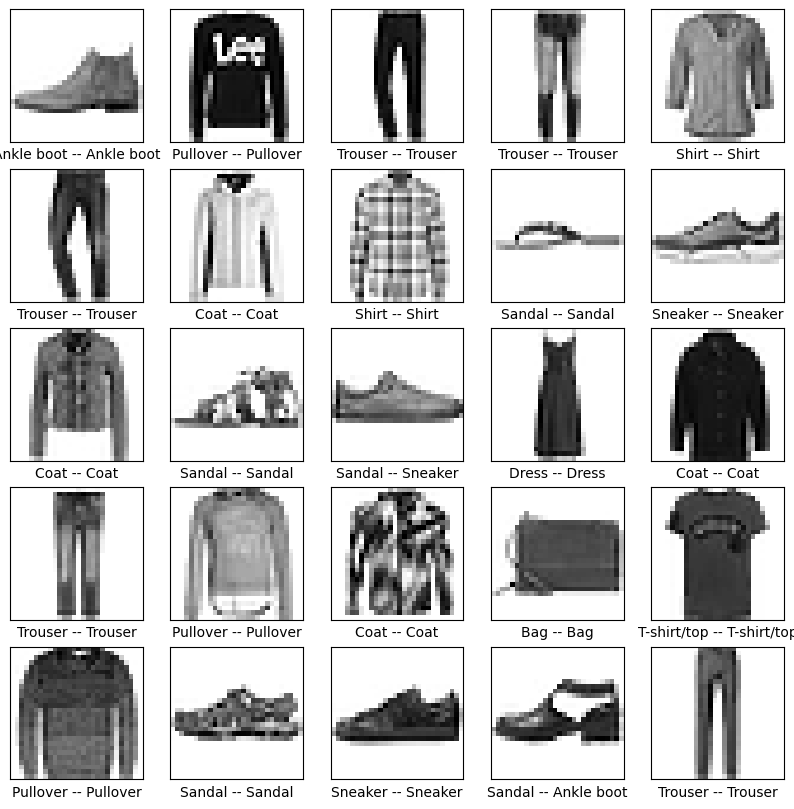

In [16]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_pred[i]] + ' -- ' + class_names[y_test[i]])
plt.show()

## Generative models


In [17]:
(train_images, train_labels), (_, _) = tf.keras.datasets.mnist.load_data()

train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
train_images = tf.image.resize(train_images, [14,14])
train_images = train_images / 255.0  # Normalize the images to [-1, 1]

BUFFER_SIZE = 600
BATCH_SIZE = 500


train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)


In [18]:
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(7*7*16, use_bias=False, input_shape=(10,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((7, 7, 16)))
    assert model.output_shape == (None, 7, 7, 16)  # Note: None is the batch size

    model.add(layers.Conv2DTranspose(8, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 8)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(8, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 8)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(1, 1), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 14, 14, 1)

    return model


def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.InputLayer(shape = [14, 14, 1]))
    model.add(layers.Conv2D(16, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[14, 14, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(32, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model



tf.Tensor([[0.00011156]], shape=(1, 1), dtype=float32)


/home/perezsalinas/Trabajo/venvs/mbr/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


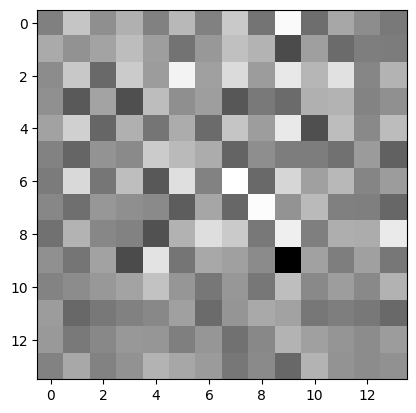

In [19]:
generator = make_generator_model()

noise = tf.random.normal([1, 10])
generated_image = generator(noise, training=False)

plt.imshow(generated_image[0, :, :, 0], cmap='gray')


discriminator = make_discriminator_model()
decision = discriminator(generated_image)

print(decision)

In [20]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)


generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)


In [21]:
EPOCHS = 50 
noise_dim = 10
num_examples_to_generate = 16

# You will reuse this seed overtime (so it's easier)
# to visualize progress in the animated GIF)
seed = tf.random.normal([num_examples_to_generate, noise_dim])


In [22]:
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))


In [23]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)


def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(4, 4))

  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
      plt.axis('off')

  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()


def train(dataset, epochs):
  for epoch in range(epochs):
    start = time.time()

    for image_batch in dataset:
      train_step(image_batch)

    # Produce images for the GIF as you go
    display.clear_output(wait=True)
    generate_and_save_images(generator,
                             epoch + 1,
                             seed)

    # Save the model every 15 epochs
    if (epoch + 1) % 15 == 0:
      checkpoint.save(file_prefix = checkpoint_prefix)

    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

  # Generate after the final epoch
  display.clear_output(wait=True)
  generate_and_save_images(generator,
                           epochs,
                           seed)


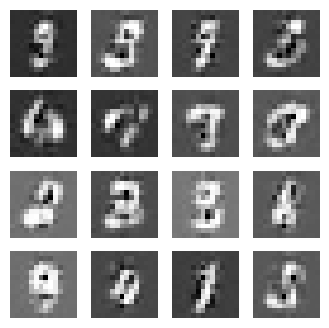

In [24]:
train(train_dataset, EPOCHS)

#Careful with training, it takes a while



In [25]:
anim_file = 'dcgan.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
  filenames = glob.glob('image*.png')
  filenames = sorted(filenames)
  for filename in filenames:
    image = imageio.imread(filename)
    writer.append_data(image)
  image = imageio.imread(filename)
  writer.append_data(image)


/tmp/ipykernel_44930/1977723166.py:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)
/tmp/ipykernel_44930/1977723166.py:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)



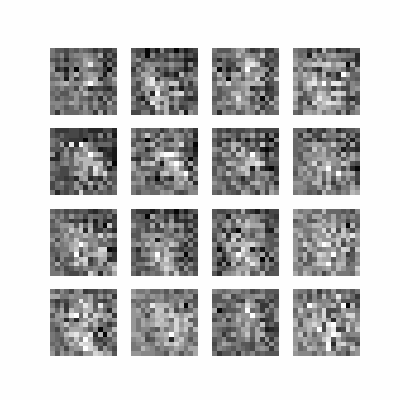

In [27]:
import tensorflow_docs.vis.embed as embed
embed.embed_file(anim_file)
